# Задание

* Попробовать найти и показать различные инсайты в этом датасете с помощью графиков Seaborn, Matplotlib и Plotly
* Дополнить графики комментариями

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [296]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [297]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,...,min_loan_balance_1q,max_loan_balance_1q,avg_loan_balance_1Y,min_cl_balance_1q,max_cl_balance_1q,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,6651.416562


In [298]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

# Распределение возраста от пола

Для начала посмотрим распределение людей по возрастам в датафрейме

<AxesSubplot:xlabel='age', ylabel='gender'>

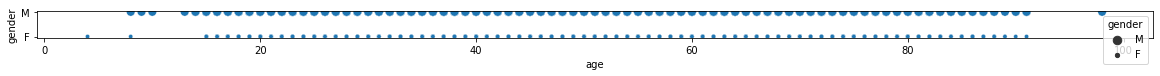

In [299]:
fig, (ax1)= plt.subplots(1,1, figsize=(20,0.5))
sns.scatterplot(
    x='age',
    y='gender',
    data=df.query("age < 100"),
    size='gender'
)

Отсюда видим, два наблюдения
1) Количество мужчин больше, чем женщин
2) Есть люди не достигшие 18 лет. И есть минимум один мужчина возрастом примерно 98 лет.  Вероятнее всего этих людей при построение модели стоит учитывать отдельно

Узнаем распределение людей по полу

In [300]:
print("Количество женщин = " + str(len(df.query('gender == "F"'))) + ", в процентах =" + str(len(df.query('gender == "F"')) / df.shape[0]))
print("Количество мужчин = " + str(len(df.query('gender == "М"'))) + ", в процентах =" + str(len(df.query('gender == "М"')) / df.shape[0]))

Количество женщин = 23874, в процентах =0.47748
Количество мужчин = 25403, в процентах =0.50806


# Распредление дохода в зависимости от города и возоаста

Теперь посмотрим зависимость параметра income от пола людей и города проживания

Text(0.5, 1.0, 'Зависимость дохода от пола')

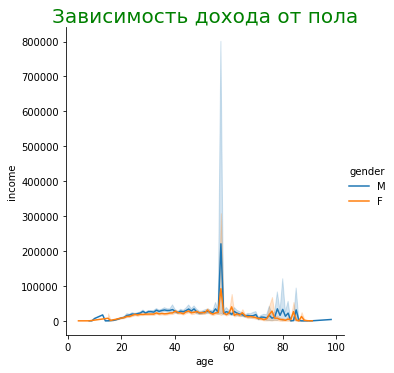

In [301]:
sns.relplot(
    x='age',
    y='income',
    data=df,
    kind='line',
    hue='gender'
)
plt.title('Зависимость дохода от возраста', size=20, color='g')

Text(0.5, 1.0, 'Зависимость дохода от места жительства')

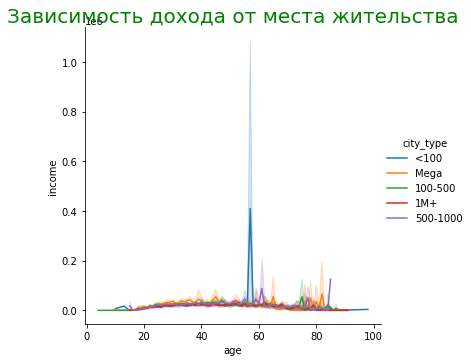

In [302]:
sns.relplot(
    x='age',
    y='income',
    data=df,
    kind='line',
    hue='city_type'
)
plt.title('Зависимость дохода от места жительства', size=20, color='g')

Как видно, есть какая-то аномалия для людей возрастом примерно 57, предположительно проживающих в очень мелких городах.

А теперь совместим два графика

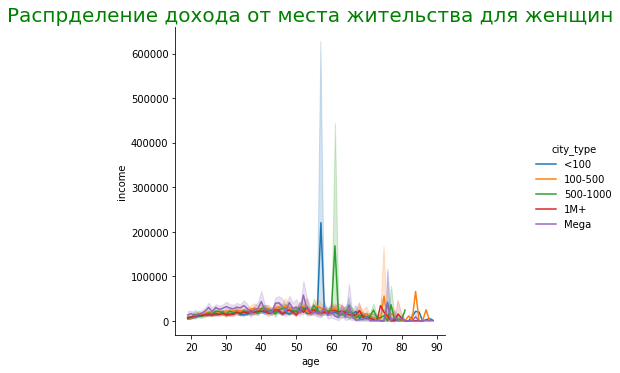

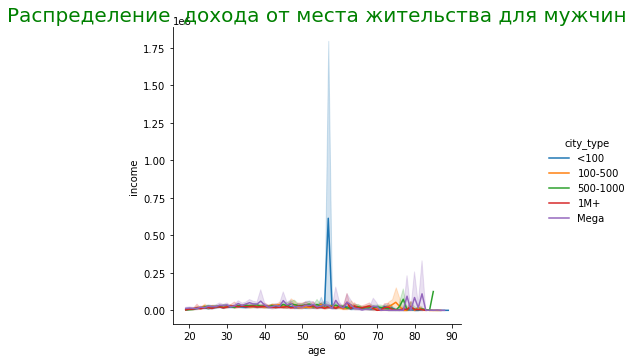

In [319]:
city_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.relplot(
    x='age',
    y='income',
    data=df.query("gender == 'F' and age > 18 and age < 90"),
    kind='line',
    hue='city_type',
    hue_order = city_order
)
plt.title('Распрделение дохода от места жительства для женщин', size=20, color='g')

sns.relplot(
    x='age',
    y='income',
    data=df.query("gender == 'М' and age > 18 and age < 90"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order
)
plt.title('Распределение  дохода от места жительства для мужчин', size=20, color='g');

Как видно мужчины и женщины в возрасте ~57 лет получают аномально большое количество денег в небольших городах. Вероятнее всего это какие-то элитные поселки.
Непонятно почему женщины выбиваются из рассмотрения женщины в городах 500-1000

Разберем данные еще более подробно

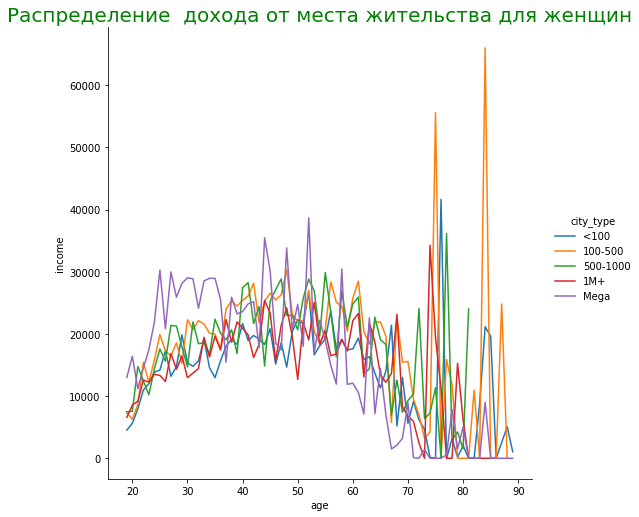

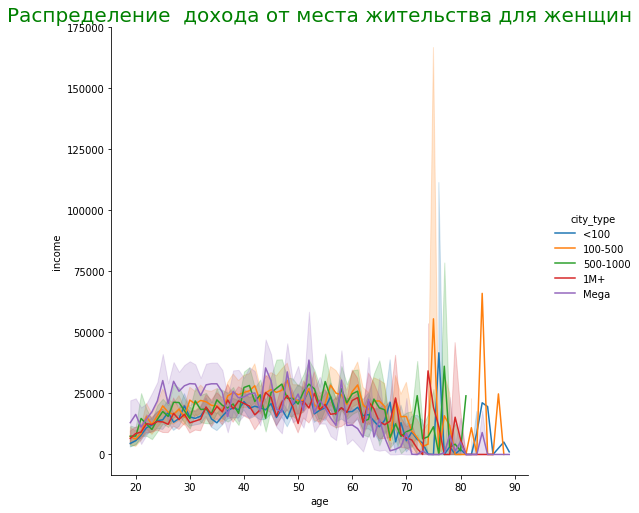

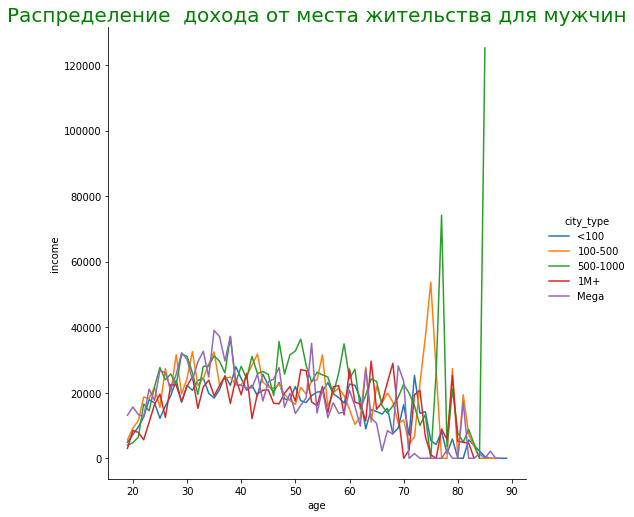

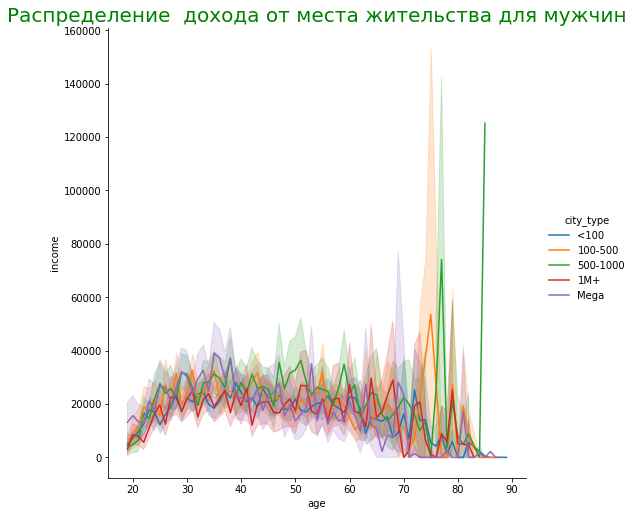

In [320]:
city_order = ['<100', '100-500', '500-1000', '1M+', 'Mega']
sns.relplot(
    x='age',
    y='income',
    data=df.query("gender == 'F' and age > 18 and age < 90 and income < 300000"),
    kind='line',
    hue='city_type',
    hue_order = city_order,
    height = 7,
    ci = None
)
plt.title('Распределение  дохода от места жительства для женщин', size=20, color='g')

sns.relplot(
    x='age',
    y='income',
    data=df.query("gender == 'F' and age > 18 and age < 90 and income < 300000"),
    kind='line',
    hue='city_type',
    hue_order = city_order,
    height = 7
)
plt.title('Распределение  дохода от места жительства для женщин', size=20, color='g')

sns.relplot(
    x='age',
    y='income',
    data=df.query("gender == 'М' and age > 18 and age < 90 and income < 300000"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7,
    ci = None
)
plt.title('Распределение  дохода от места жительства для мужчин', size=20, color='g');
sns.relplot(
    x='age',
    y='income',
    data=df.query("gender == 'М' and age > 18 and age < 90 and income < 300000"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Распределение  дохода от места жительства для мужчин', size=20, color='g');

Как видно из графиков для людей старше ~83 лет для женщин и ~85 лет для мужчин отсутсвует размытие. Это связано с низким количеством людей этого возраста.

# График корреляций (Heatmap)

In [ ]:
corr = df.corr()

<AxesSubplot:>

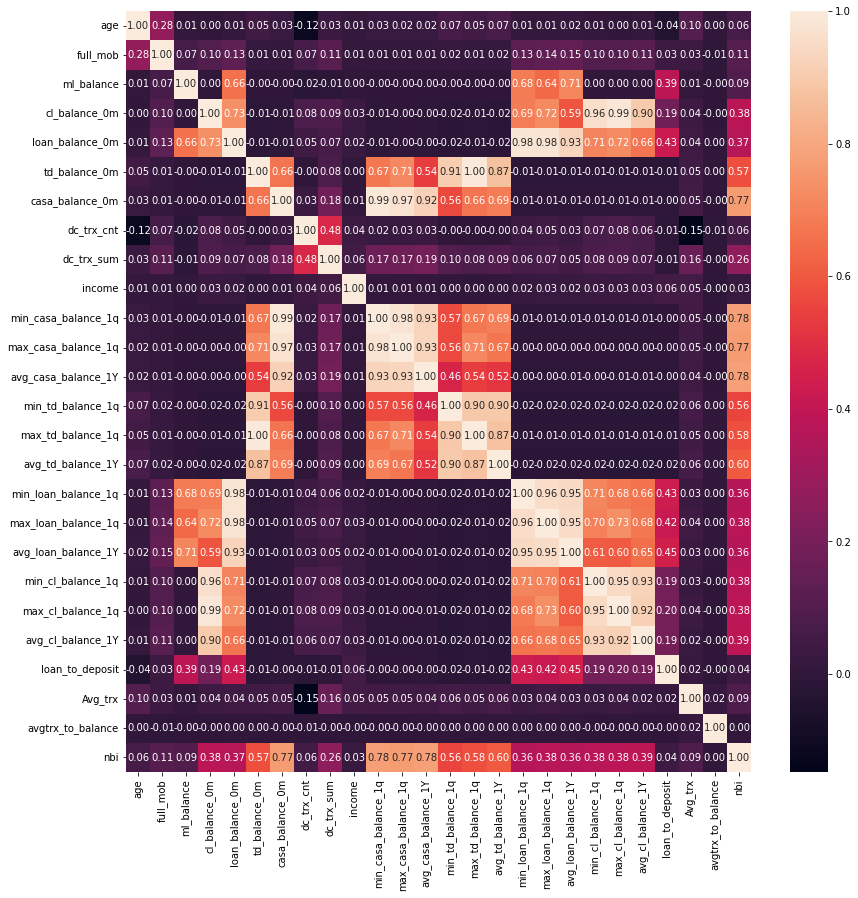

In [137]:
fig, (ax1)= plt.subplots(1,1, figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax1)

Можно детальнее посмотреть на поля:
min_casa_balance_1q, max_casa_balance_1q, avg_casa_balance_1y
min_td_balance_1q, max_td_balance_1q, avg_td_balance_1y
min_loan_balance_1q, max_loan_balance_1q, avg_loan_balance_1y
min_cl_balance_1q, max_cl_balance_1q, avg_cl_balance_1y

In [80]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

In [81]:
cols = ['city_type',
        'min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y',
        'min_td_balance_1q', 'max_td_balance_1q', 'avg_td_balance_1Y',
        'min_loan_balance_1q', 'max_loan_balance_1q', 'avg_loan_balance_1Y',
        'min_cl_balance_1q', 'max_cl_balance_1q', 'avg_cl_balance_1Y']

In [120]:
cols1 = ['city_type',
        'min_casa_balance_1q', 'max_casa_balance_1q', 'avg_casa_balance_1Y',
        'min_td_balance_1q', 'max_td_balance_1q', 'avg_td_balance_1Y',]
cols2 = ['city_type',
        'min_loan_balance_1q', 'max_loan_balance_1q', 'avg_loan_balance_1Y',
        'min_cl_balance_1q', 'max_cl_balance_1q', 'avg_cl_balance_1Y']

In [88]:
df['city_type'].unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [118]:
df_new = df[cols1]

In [134]:
annot_kws={"size": 30}

<AxesSubplot:title={'center':'Mega'}>

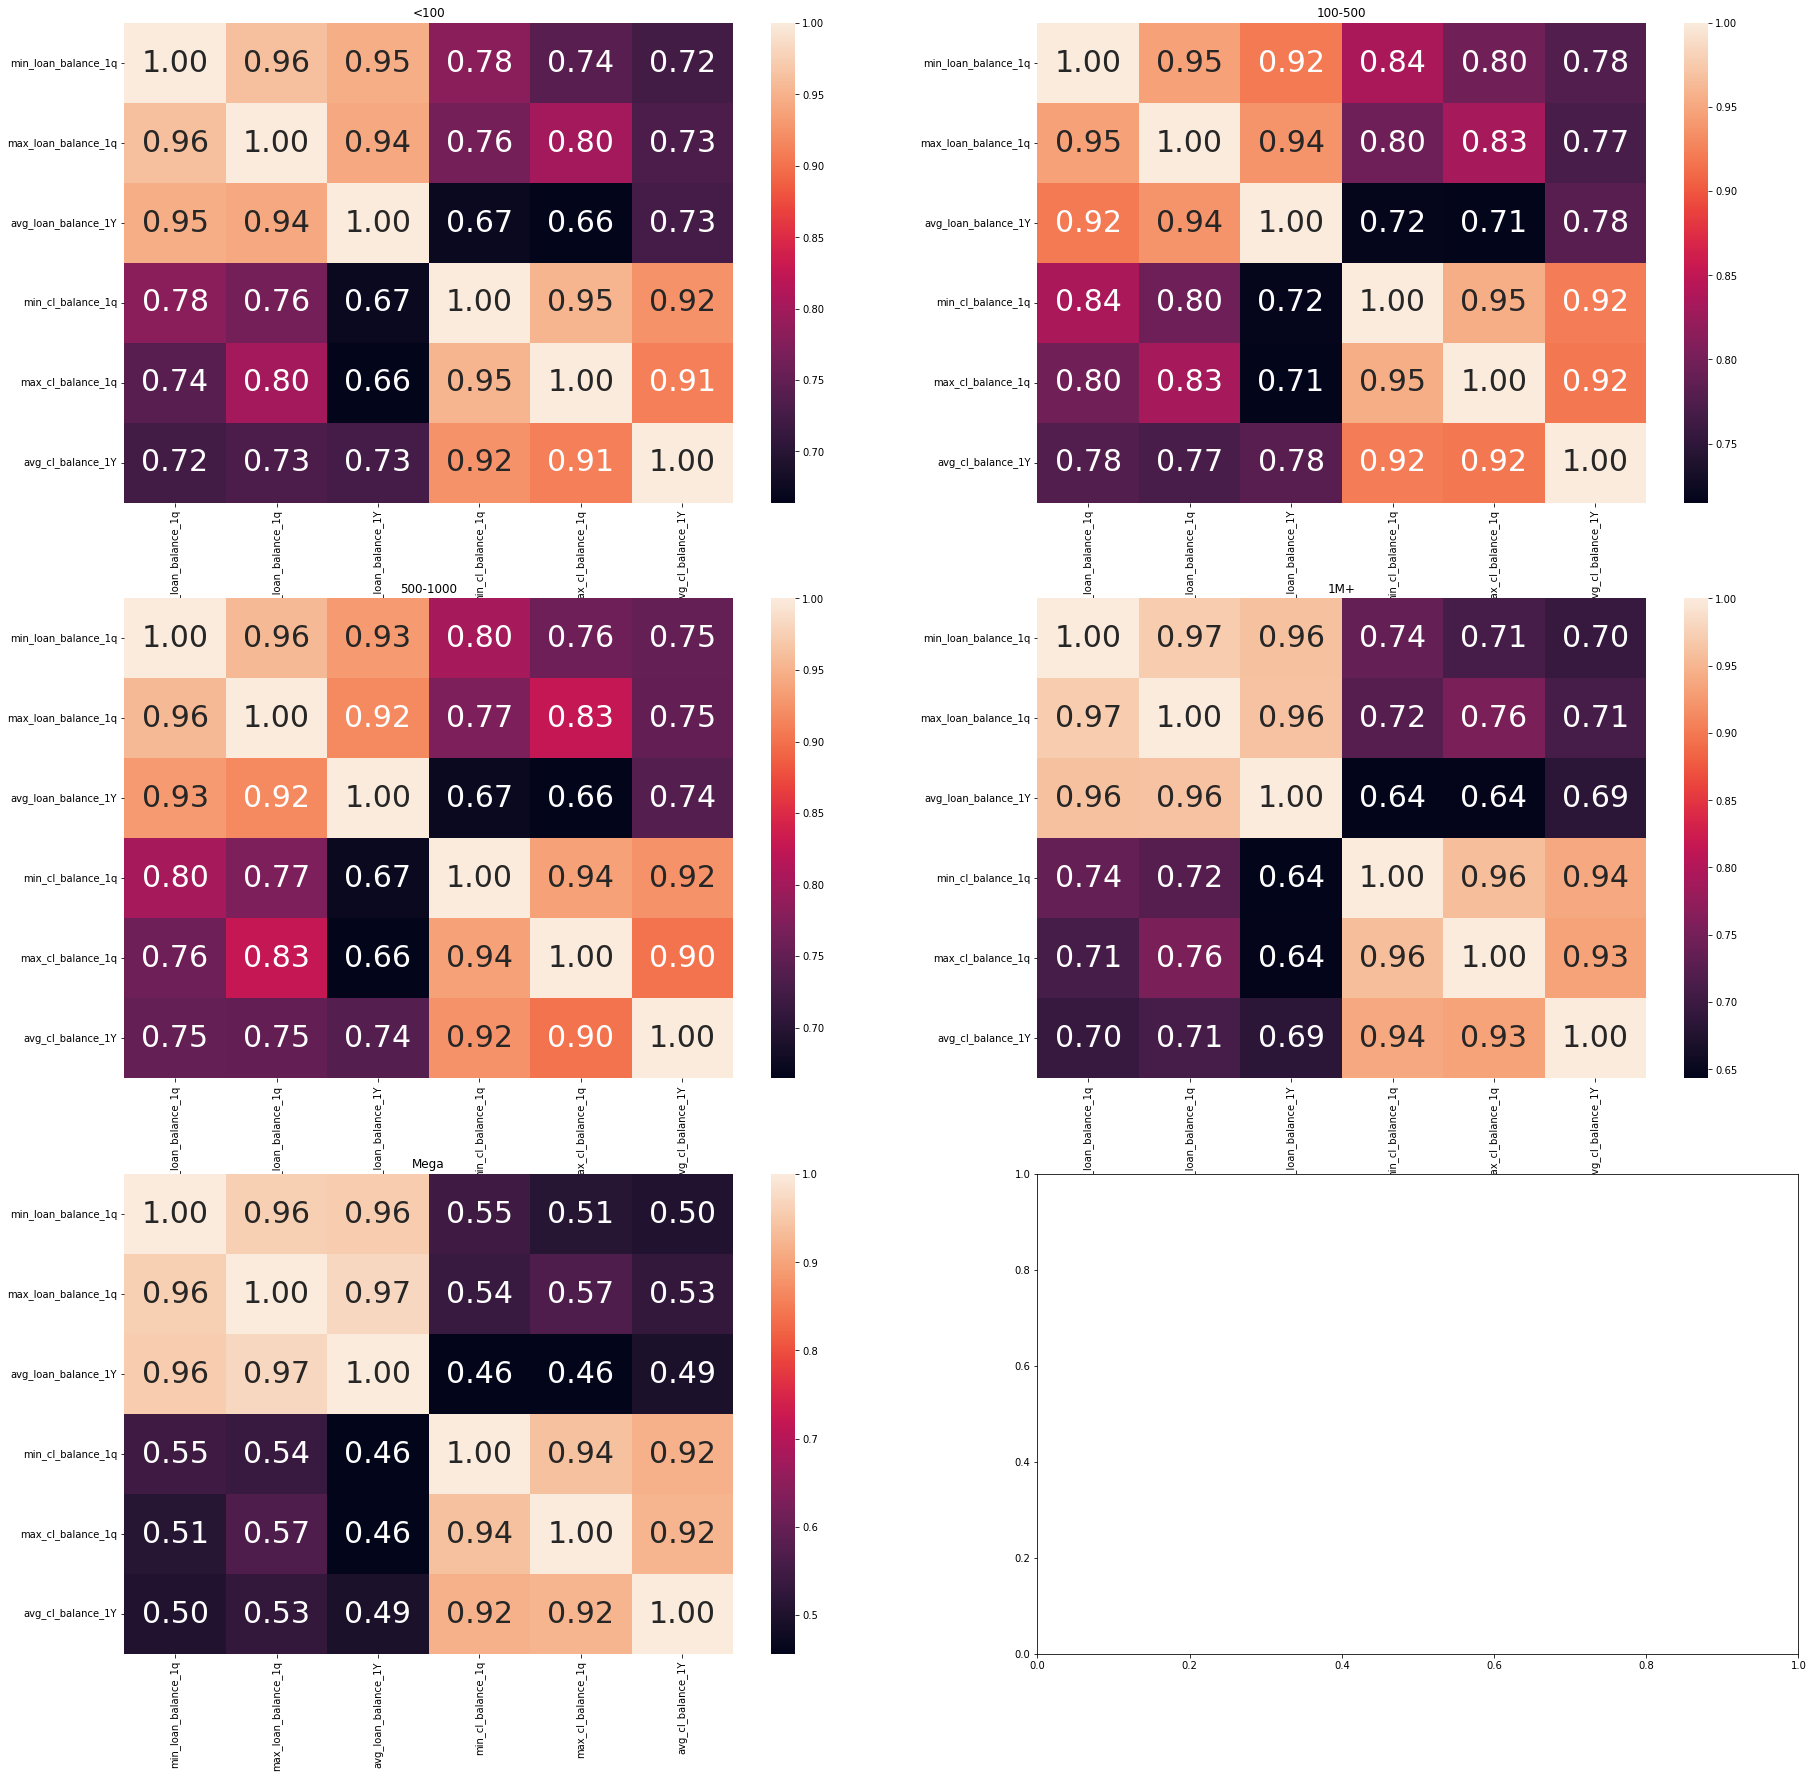

In [135]:
fig, ax= plt.subplots(3,2, figsize=(30,30))
ax[0][0].set_title('<100')
sns.heatmap(df_new.query('city_type == "<100"').corr(), annot=True, fmt='.2f', ax=ax[0][0], annot_kws=annot_kws)
ax[0][1].set_title('100-500')
sns.heatmap(df_new.query('city_type == "100-500"').corr(), annot=True, fmt='.2f', ax=ax[0][1], annot_kws=annot_kws)
ax[1][0].set_title('500-1000')
sns.heatmap(df_new.query('city_type == "500-1000"').corr(), annot=True, fmt='.2f', ax=ax[1][0], annot_kws=annot_kws)
ax[1][1].set_title('1M+')
sns.heatmap(df_new.query('city_type == "1M+"').corr(), annot=True, fmt='.2f', ax=ax[1][1], annot_kws=annot_kws)
ax[2][0].set_title('Mega')
sns.heatmap(df_new.query('city_type == "Mega"').corr(), annot=True, fmt='.2f', ax=ax[2][0], annot_kws=annot_kws)

Между сильно коррелирующими признаками нет особой разницы между населением городов, но например для min_cl_balance_1q и avg_balance_1Y корреляция может меняться от 0.46 до 0.72
При построении моделей имеет смысл смотреть корреляции раздельно для разного населения по городам. Возможно удастся найти интересные зависимости которые иногда можно применять.

## Исключим сильно коррелирующие признаки

<AxesSubplot:>

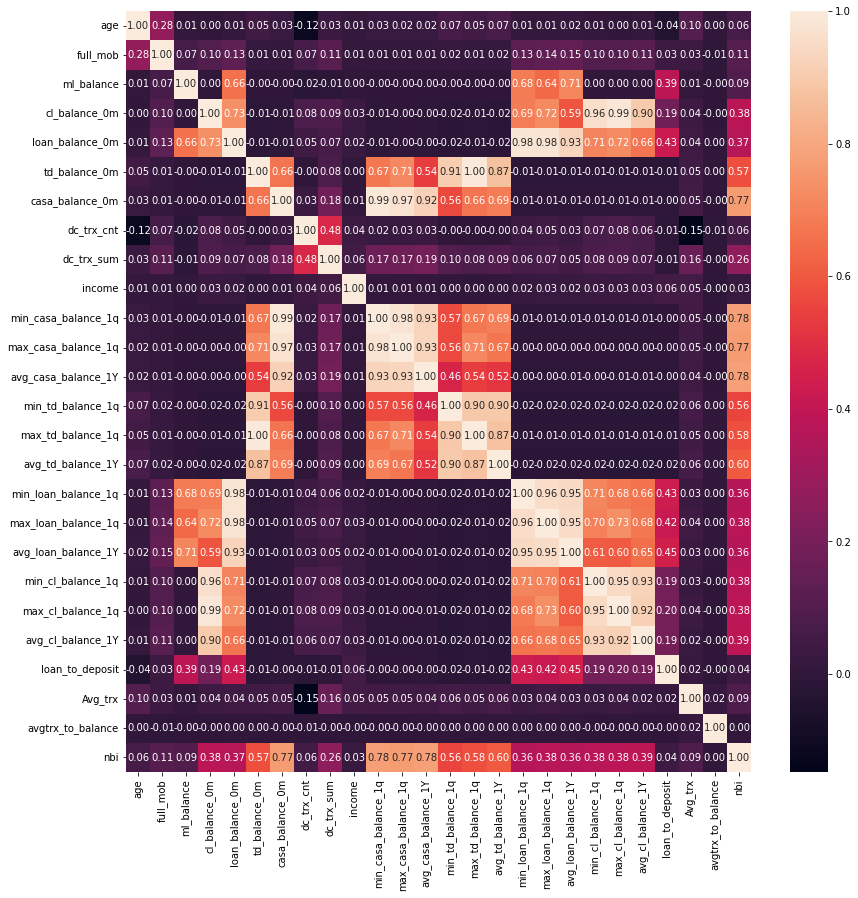

In [264]:
fig, (ax1)= plt.subplots(1,1, figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax1)

In [267]:
df.columns

Index(['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income', 'min_casa_balance_1q', 'max_casa_balance_1q',
       'avg_casa_balance_1Y', 'min_td_balance_1q', 'max_td_balance_1q',
       'avg_td_balance_1Y', 'min_loan_balance_1q', 'max_loan_balance_1q',
       'avg_loan_balance_1Y', 'min_cl_balance_1q', 'max_cl_balance_1q',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi'],
      dtype='object')

In [269]:
columns = ['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income',
       'avg_casa_balance_1Y',
       'avg_td_balance_1Y',
       'avg_loan_balance_1Y',
       'avg_cl_balance_1Y', 'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi']

In [270]:
data = df[columns]

In [271]:
data

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,avg_casa_balance_1Y,avg_td_balance_1Y,avg_loan_balance_1Y,avg_cl_balance_1Y,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.00,0.0,0.0000,0,0.00,0.00,0.000000,0.0,0.000000,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.00,0.0,3272.9367,0,0.00,0.00,4716.127317,0.0,0.000000,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.00,0.0,6249.7550,6,5128.02,0.00,10239.601283,0.0,0.000000,0.0,NaN,854.670000,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.00,0.0,14354.9370,0,0.00,0.00,13905.841283,0.0,0.000000,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.00,0.0,91511.7691,0,0.00,0.00,96089.612758,0.0,0.000000,0.0,NaN,NaN,NaN,6651.416562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,57,F,<100,97,0.0,0.0,0.00,1247018.0,0.8800,0,0.00,0.00,2003.093333,1325809.0,0.000000,0.0,0.0,NaN,NaN,13775.933155
49996,58,F,Mega,34,0.0,0.0,0.00,1000000.0,0.0000,0,0.00,0.00,0.000000,1000000.0,0.000000,0.0,0.0,NaN,NaN,8247.466438
49997,34,М,1M+,21,0.0,0.0,0.00,0.0,6450.9300,73,118358.38,12405.50,9010.019167,0.0,0.000000,0.0,NaN,1621.347671,0.179949,1973.128710
49998,43,М,<100,52,0.0,0.0,39318.52,0.0,4101.1200,0,0.00,0.00,3787.540000,0.0,63442.406667,0.0,NaN,NaN,NaN,5101.543269


<AxesSubplot:>

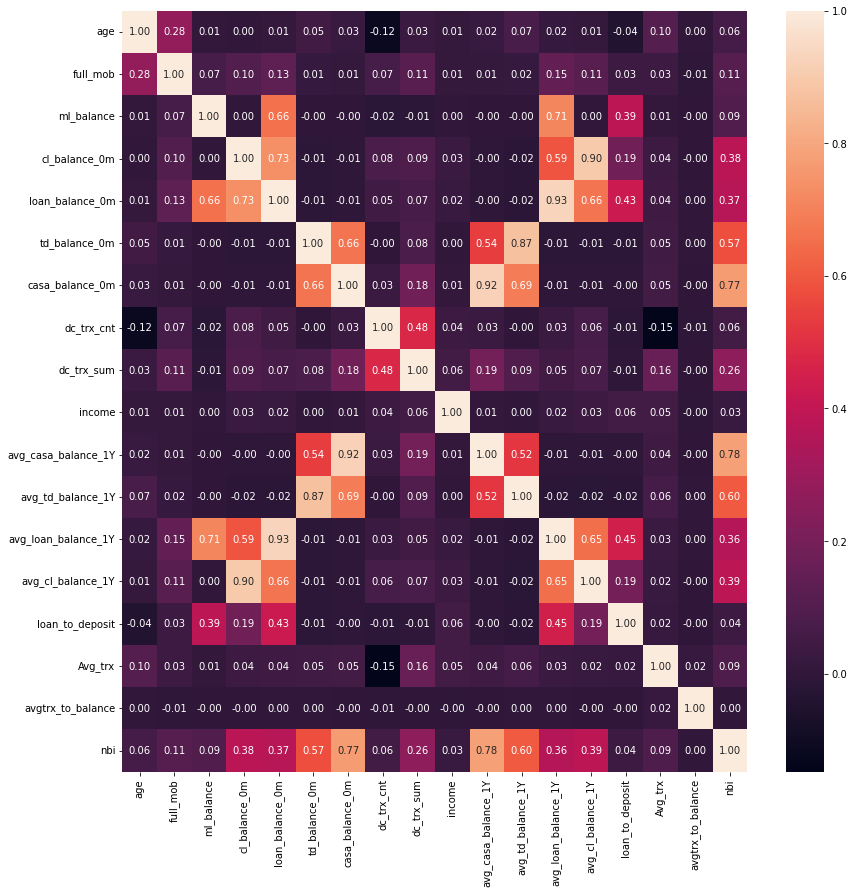

In [272]:
fig, (ax1)= plt.subplots(1,1, figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax1)

Так же можно заметить среднюю корреляцию между количеством трат по картам и средней транзакцией (0,48)

Так же сильные корреляции наблюдаются между cl_balance_0m и avg_clinet_balance_1y
loan_balance_0m и avg_loan_balance_1Y
td_balance_0m и avg_td_balance_1Y
case_balance_0m и avg_casa_balance_1Y
Что в принципе не является чем-то удивительным

Между некоторыми полями датафрейма существует сильная корреляция. Если надо было бы предсказать какие-то из этих полей, то можно было бы воспользоваться этой корреляцией.
Кроме того, с ее помощью можно было бы заполнить NaN поля, опираясь на корреляцию этих признаков с другими.

In [274]:
columns = ['age', 'gender', 'city_type', 'full_mob', 'ml_balance', 'cl_balance_0m',
       'loan_balance_0m', 'td_balance_0m', 'casa_balance_0m', 'dc_trx_cnt',
       'dc_trx_sum', 'income',
        'loan_to_deposit', 'Avg_trx', 'avgtrx_to_balance',
       'nbi']

In [275]:
data = df[columns]

<AxesSubplot:>

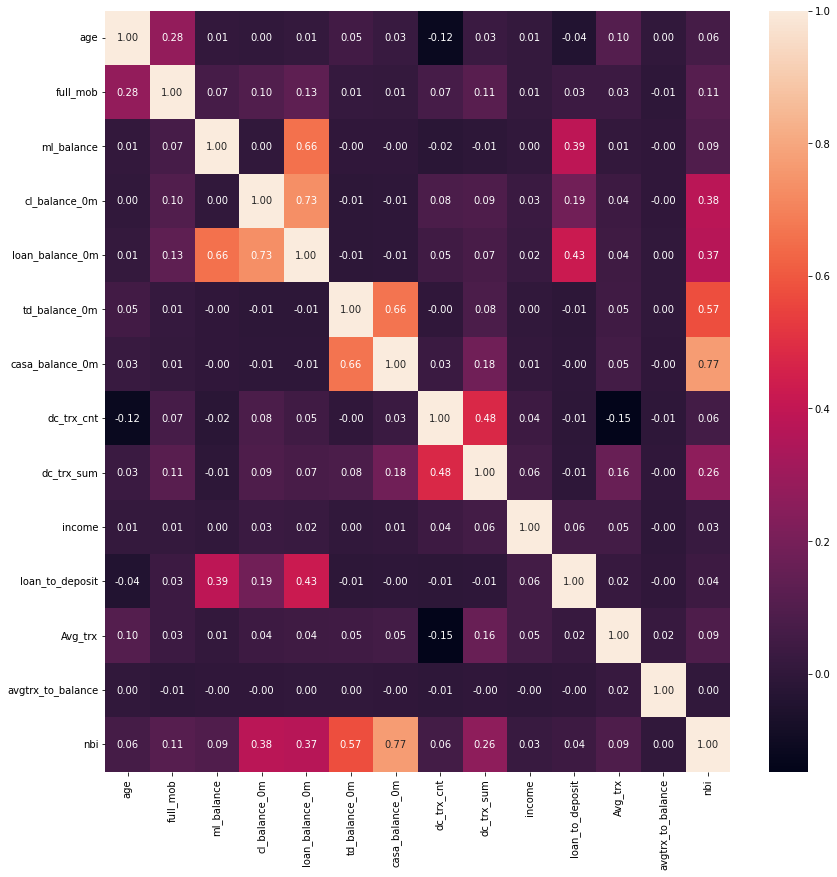

In [276]:
fig, (ax1)= plt.subplots(1,1, figsize=(14,14))
sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax1)

А теперь построим корреляции для разных городов по отдельности

<AxesSubplot:title={'center':'Mega'}>

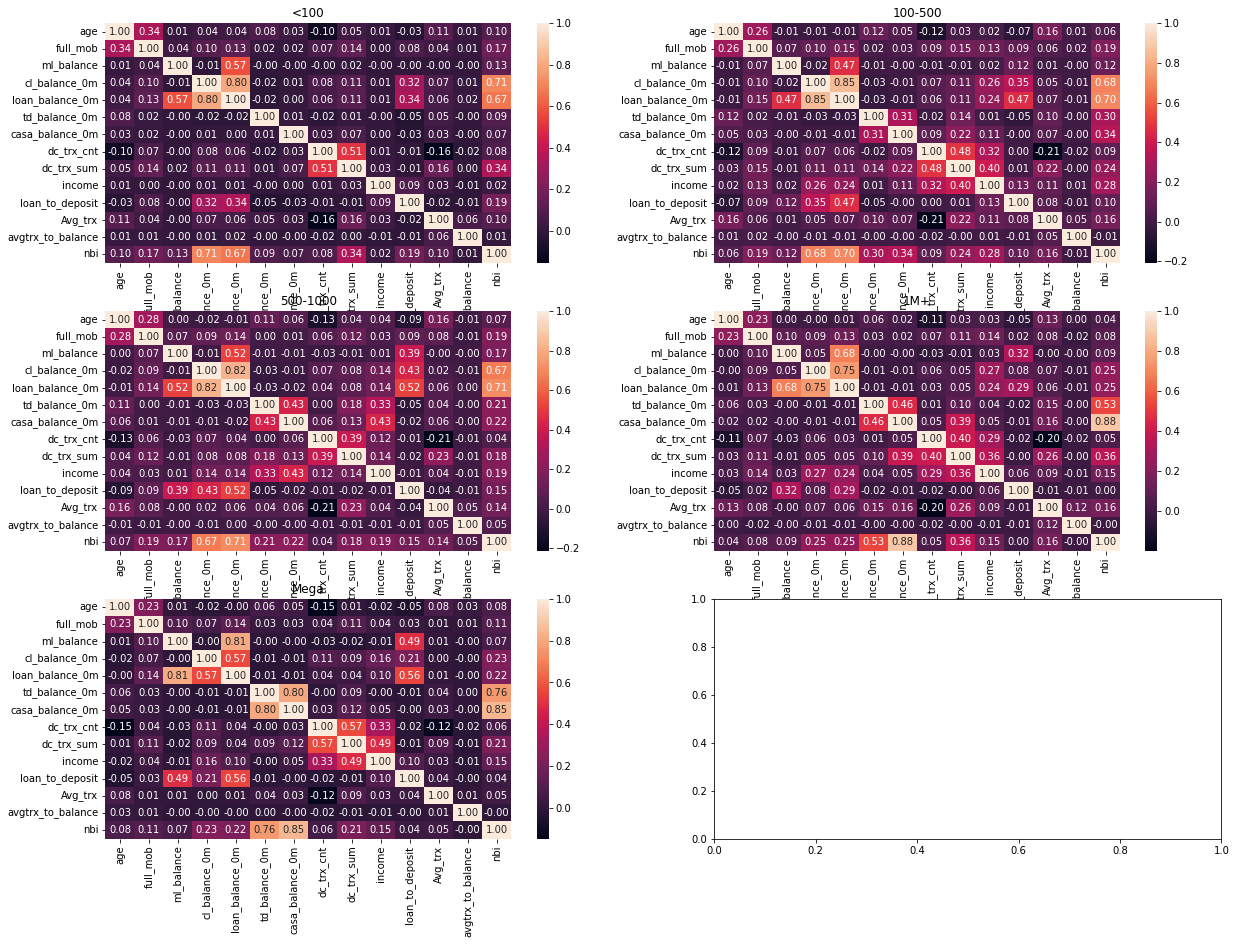

In [316]:
fig, ax= plt.subplots(3,2, figsize=(20,15))
ax[0][0].set_title('<100')
sns.heatmap(data.query('city_type == "<100"').corr(), annot=True, fmt='.2f', ax=ax[0][0])
ax[0][1].set_title('100-500')
sns.heatmap(data.query('city_type == "100-500"').corr(), annot=True, fmt='.2f', ax=ax[0][1])
ax[1][0].set_title('500-1000')
sns.heatmap(data.query('city_type == "500-1000"').corr(), annot=True, fmt='.2f', ax=ax[1][0])
ax[1][1].set_title('1M+')
sns.heatmap(data.query('city_type == "1M+"').corr(), annot=True, fmt='.2f', ax=ax[1][1])
ax[2][0].set_title('Mega')
sns.heatmap(data.query('city_type == "Mega"').corr(), annot=True, fmt='.2f', ax=ax[2][0])

В зависимости от размера города особенно сильно меняются некоторые корреляции. Если бы надо было строить модель, этим можно было бы воспользоваться.
Например, cl_balance_0m меняется от 0.71 до 0.23 c ростом населения, в то время как td_balance_0m наоборот растет с 0.09 до 0.76

## Датафрейм без сильной корреляции

Чтобы исключить сильно коррелирующие друг с другом признаки из df можно создать новый dataframe

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам

* income	доход клиента
* loan_to_deposit

* Avg_trx	средний размер транзакции
* avgtrx_to_balance
* nbi	доход от клиента без OPEX

In [277]:
data.head()

,age,gender,city_type,full_mob,ml_balance,cl_balance_0m,loan_balance_0m,td_balance_0m,casa_balance_0m,dc_trx_cnt,dc_trx_sum,income,loan_to_deposit,Avg_trx,avgtrx_to_balance,nbi
0,71,NaN,<100,103,0.0,0.0,0.0,0.0,0.0000,0,0.00,0.0,NaN,NaN,NaN,NaN
1,49,NaN,Mega,81,0.0,0.0,0.0,0.0,3272.9367,0,0.00,0.0,NaN,NaN,NaN,28.762952
2,56,NaN,Mega,81,0.0,0.0,0.0,0.0,6249.7550,6,5128.02,0.0,NaN,854.67,0.083467,1973.335539
3,47,NaN,Mega,81,0.0,0.0,0.0,0.0,14354.9370,0,0.00,0.0,NaN,NaN,NaN,364.008556
4,74,NaN,Mega,81,0.0,0.0,0.0,0.0,91511.7691,0,0.00,0.0,NaN,NaN,NaN,6651.416562


# Распределение кредитов от возраста

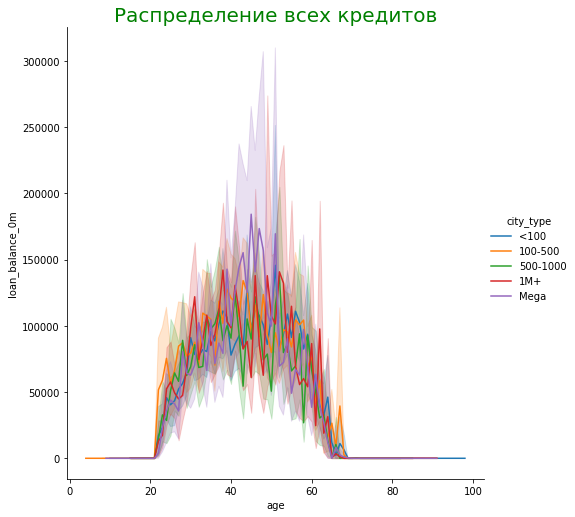

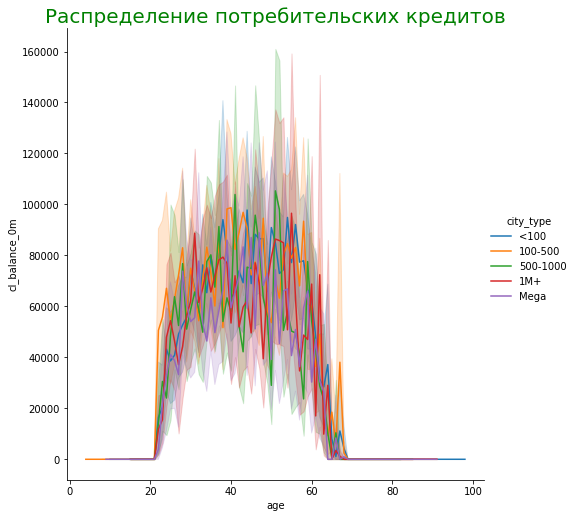

In [287]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    data=data,
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Распределение всех кредитов', size=20, color='g');

sns.relplot(
    x='age',
    y='cl_balance_0m',
    data=data,
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Распределение потребительских кредитов', size=20, color='g');

Теперь нарисуем снова эти граифики с учетом возраста

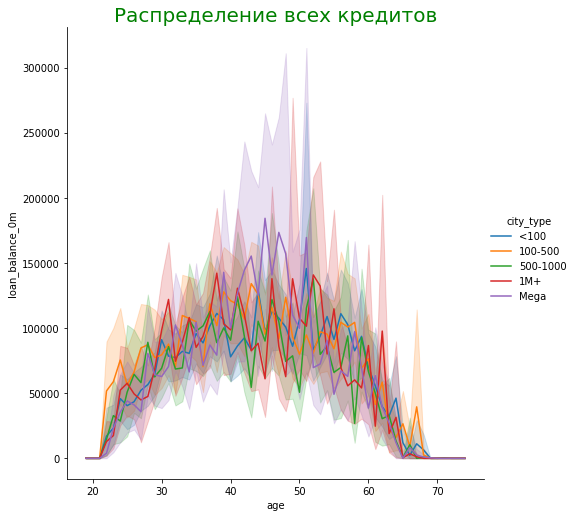

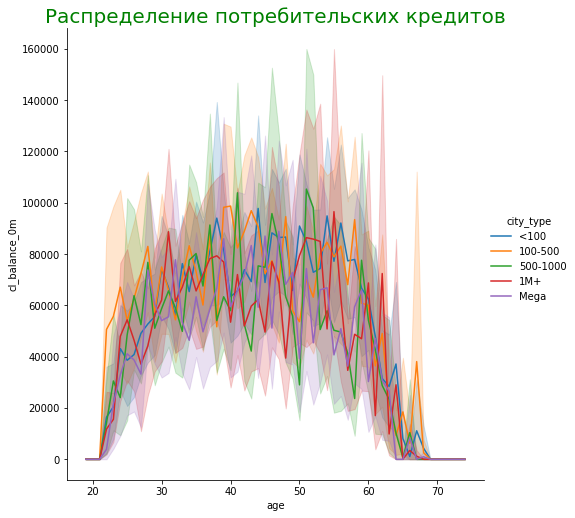

In [288]:
sns.relplot(
    x='age',
    y='loan_balance_0m',
    data=data.query("age > 18 and age < 75"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Распределение всех кредитов', size=20, color='g');

sns.relplot(
    x='age',
    y='cl_balance_0m',
    data=data.query("age > 18 and age < 75"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Распределение потребительских кредитов', size=20, color='g');

Можно заметить, что для всех кредитов выбивается поведение для Mega-городов для людей 42-50 лет. Веротянее всего эти кредиты-ипотеки. Которые люди покупают для себя/детей.

# Доход клиента без ОРЕХ в зависимости от возраста

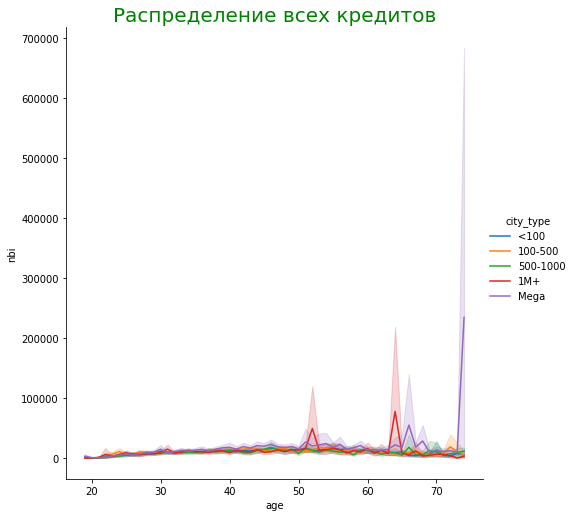

In [293]:
sns.relplot(
    x='age',
    y='nbi',
    data=data.query("age > 18 and age < 75"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Доход клиента без ОРЕХ', size=20, color='g');

Снова наблюдаем выброс, который создаем мужчина 75-ти лет

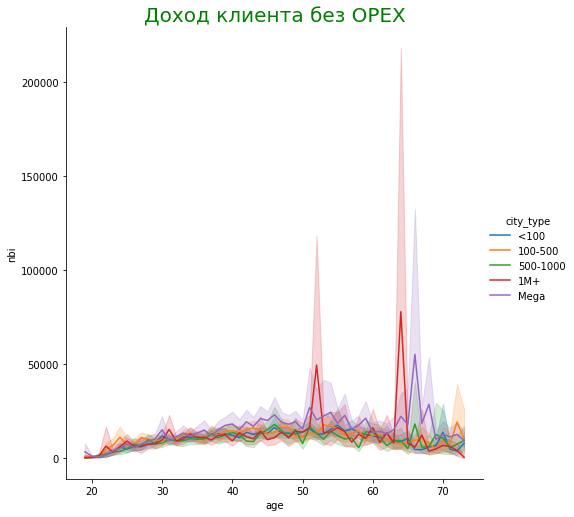

In [295]:
sns.relplot(
    x='age',
    y='nbi',
    data=data.query("age > 18 and age < 74"),
    kind='line',
    hue='city_type',
    col_order = city_order,
    hue_order = city_order,
    height = 7
)
plt.title('Доход клиента без ОРЕХ', size=20, color='g');

Общее наблюденгие для всех графиков зависимость денежных потоков от возраста часто имеет вид перевернутой параболы с 18 до примерно 70 лет. Далее она превращается в прямую почти параллельную оси x